# COGS 108 Final Project

# Overview

### In this project I started by analyzing what datasets I wanted to make use of for this project. Followed by that I imported all the relevant data, cleaned it, then grouped it to figure out if my hypothesis was correct.



### My results showed that there is not a relationship between the median family income in a given zipcode and a price rating on Yelp. I found this to be quite surprising, as I expected higher income zipcodes to have more expensive restaurants.

### Joshua Hussong, A15093653

# Research Question

### My question: Is there a relationship between the median family income in a given zipcode and a restaurant's price rating on Yelp?

#### In other words I hope to whethere there are more expensive restaurants based on a price rating, in more expensive neighborhoods.

# Background and Prior Work

#### I resused the basic information regarding food safety, and food inspections from my project proposal. I am adding more information regarding the Yelp price rating metric. 

#### According to a link on Yelp, provided by a peer on piazza, the Yelp price ratings are as follows:

#### "It's one of the survey questions that pops up when one checks in: "Price per Person." 

##### 1 dollar sign = under 10. 

##### 2 dollar signs = 11-30. 

##### 3 dollar signs = 31-60. 

##### 4 dollar signs = over 61.

The first link is informative on background information regarding food safety, and food inspections. They list out the different establishment types that are inspected. They also informed me more about the different levels of risk within different establishments. The website also discussed different violations and how establishments get shut down. The authors go into further detail discussing the differences between violations, and specific DC food regulations that are required. (https://dchealth.dc.gov/)

The second link is less informative and gives more knowledge on how owners of restaurants can prepare for food inspections. They focus on different regulations that the government requires, such as cross-contamination and food safety. They also discuss pests and cleanliness levels required. (https://pos.toasttab.com/blog/on-the-line/restaurant-inspection)

I added a third link to give me more specific information regarding my research proposal and question. I noticed that it has been asked and analyzed before, specifically in Philadelphia. I think that this proves that my research question is valid and should be considered in other locations of the country. The article showed chain versus non-chain restaurants and the frequency of violations; however, I want to focus more on style of cuisine. These results showed that chains got less violations per inspection. This is something to consider when analyzing my data to see if I get similar results in my question. (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5349477/)

References (include links):

1) https://dchealth.dc.gov/service/understanding-food-establishment-inspections

2) https://pos.toasttab.com/blog/on-the-line/restaurant-inspection

3) https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5349477/

# Hypothesis


##### My hypothesis is that there is a relationship between the median family household income (based on zip)  and the price rating on Yelp. In other words, are there more expensive restaurants in higher income zipcodes, and the other way around as well.

##### I believe this because in the area I grew up in, there were wealthier neighborhoods, which would lead to wealthier zipcodes. Based on this, I would assume that there would be a higher chance for there to be higher price rated restaurants on Yelp.

# Dataset(s)


### The datasets I made use of were the Yelp dataset and the zipcode dataset provided by the professor. 


Dataset Name: Yelp Dataset

Link to the dataset: provided by professor on Canvas

Number of observations: There were 132,804 total observations; however, from this dataset I only made use of a few columns.

The dataset contains information about the restaurant, the price rating, and the different food categories the restaurants fall under.


Dataset Name: Zipcode Dataset

Link to the dataset: provided by professor on Canvas

Number of observations: There were 312 total observations; however, from this dataset I only made use of a few columns.

The dataset contains information about the different zipcodes. It discusses the median household income, a lot of information about the monetary values, and some racial background information. This could have been something that I utilized as well, but for lack of time I kept my analyses smaller.

# Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc
from scipy import stats

In [2]:
rest_df = pd.read_csv('restaurants.csv')
insp_df = pd.read_csv('inspections.csv')
yelp_df = pd.read_csv('yelp.csv')
zip_df = pd.read_csv('zipcodes.csv')

# Data Cleaning


I want to rename the columns so I can merge based on zip_code, then I want to do an inner merge, followed by dropping columns that I consider not important for my data. I continue this by sorting the data based on price, and then drop Nan values and rename some columns that had misspellings. After that I convert the dollar signs in the price column into numerical values.

In [3]:
zip_df = zip_df.rename(columns  = {'zip':'zip_code'})
yelp_zip_merge = pd.merge(zip_df, yelp_df, on = 'zip_code', how = 'inner')
yelp_zip_merge = yelp_zip_merge.drop(yelp_zip_merge.columns[-21:],axis = 1)
yelp_zip_merge = yelp_zip_merge.drop(['is_closed','latitude','longitude',
                                      'percent_supplemental_security_income','percent_snap_benefits'], axis = 1)
yelp_zip_merge = yelp_zip_merge.sort_values(by='price', ascending=True)
yelp_zip_merge = yelp_zip_merge.dropna(subset=['price'])
yelp_zip_merge = yelp_zip_merge.rename(columns  = {'percent_damilies_below_poverty_line':'percent_families_below_poverty_line'})
yelp_zip_merge = yelp_zip_merge[:-48]
conversion = {'$':1,'$$':2,'$$$':3}
final_df = yelp_zip_merge.replace(conversion)

In [4]:
#final_df['zip_code'].value_counts()

In [5]:
#df_zip_sorted['zip_code'].value_counts().sort_index()

### Note: 27522 and 27592 should be dropped bc less than 5 values for the scipy.stats values, but for the sake of including all data I will keep it and make note of it at the end in my conclusion.

# Data Analysis, Visualization & Results

## EDA


The variables are all medians from the zipcode dataset. Thus, I am assuming there were outliers from the original dataset. However, since they are already translated to medians from the original dataset, I stuck with all the results. The median is the most robust and least affected by outliers, so these results should all be safe to assume that there are no outliers. I did notice that there were 2 zipcodes with a small amount of results; however, I kept them in my analysis because they already got moved into medians. This is something to consider moving forward if I were to redo my project or expand upon it. There did not appear to be any variables that were noticeably correlated without further analysis. Minor relationships probably occurred, but given the smaller dataset this could be due to random chance, and not representative of the overall population. Also, it depends if we consider the state to be the overall population or the United States. 

#### There is an outlier test that I used. I proved that there were no outliers in the median family income dollars, but the small sample size from some of the zipcods could have been an issue.

In [6]:
outliers=[]
def detect_outlier(data_1):
    
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

detect_outlier(yelp_zip_merge['median_family_income_dollars'])

[]

### In the results I am going to start by finding the number of dollar sign restaurants in our dataset after cleaning the data.

In [7]:
yelp_zip_merge['price'].value_counts()

$$     1227
$      1180
$$$      91
Name: price, dtype: int64

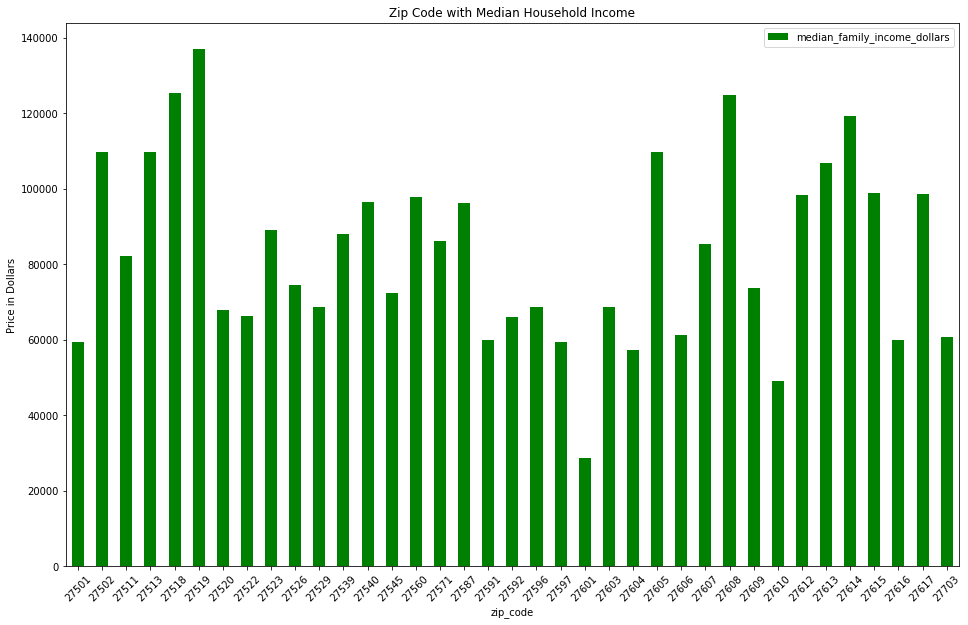

In [8]:
selected_columns = final_df[["zip_code","median_family_income_dollars"]]

graph1 = selected_columns.copy()

graph1



graph1.groupby(['zip_code']).median().plot(kind='bar',color='green',figsize=(16,10))
plt.title('Zip Code with Median Household Income')
plt.ylabel('Price in Dollars')
degrees = 45
plt.xticks(rotation=degrees)
#plt.xticks(fontsize= 10)
plt.show()

### I am going to do 3 separate graphs. In this graph I am sorting by zip_code and using the median family income in dollars for us to visualize the data.


#### I start by grouping the data, then give it a title, then make some minor adjustments to the size, x ticks  and labels.

### This graph above shows that just based on visualization, there appears to be differences in median household income based on zip code. We see that there is one zipcode that is quite lower, and a few that are quite higher. These were proven to not be outliers, so I included them all to give a strong representation of the data. However, they had small datapoints.

Text(0, 0.5, 'Yelp Rating (1-5)')

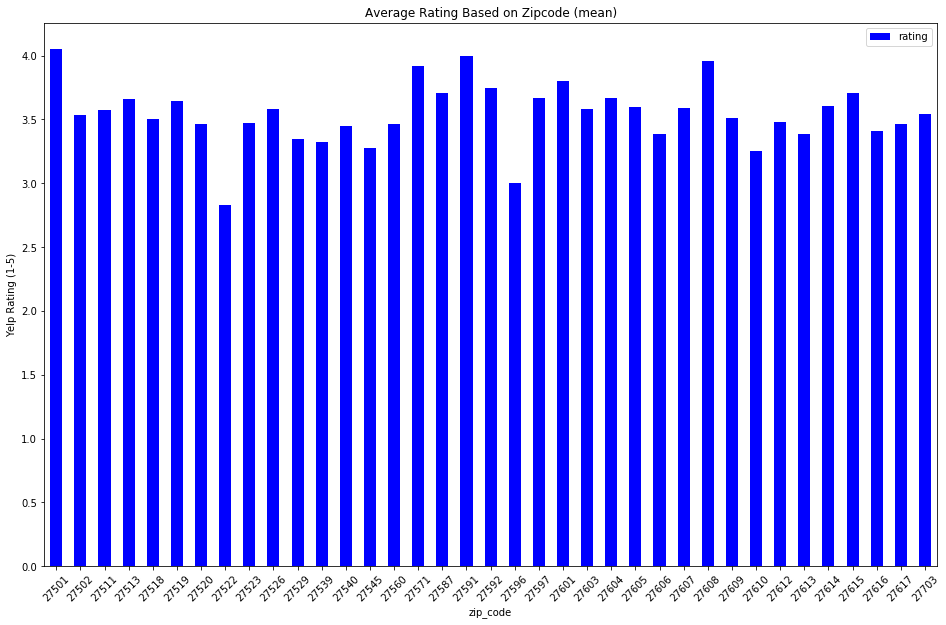

In [9]:
selected_columns_2 = final_df[["zip_code",'rating']]


graph2 = selected_columns_2.copy()

graph2


graph2.groupby(['zip_code']).mean().plot(kind='bar',color='blue',figsize=(16,10))
plt.title('Average Rating Based on Zipcode (mean)')
degrees = 45
plt.xticks(rotation=degrees)
plt.ylabel('Yelp Rating (1-5)')

### This will be the second graph above. In this I am still grouping by zip_code and now visualizing the median rating for the restaurants within the given zip codes. I think this graph is useful to allow us to see what quality of restaurants we are having within different zip codes. If I had more time, or in the future I am considering using the ratings to explore more relationships within the data.


#### I start by grouping the data, and doing the same things as above in  graph1.


### The graph isn't the best at visualizing the data; however, it does show that there appears to be no difference amongst average ratings based on the zipcode. I made this graph to visualize if people tended to rate certain restaurants differently based on their income background. Also, it woud allow me to see better if there were a few restaurants that were being rated significantly lower than others, pointing out potential outliers in the dataset.

([<matplotlib.axis.YTick at 0x7fb9bee3ca58>,
 <a list of 20 Text yticklabel objects>)

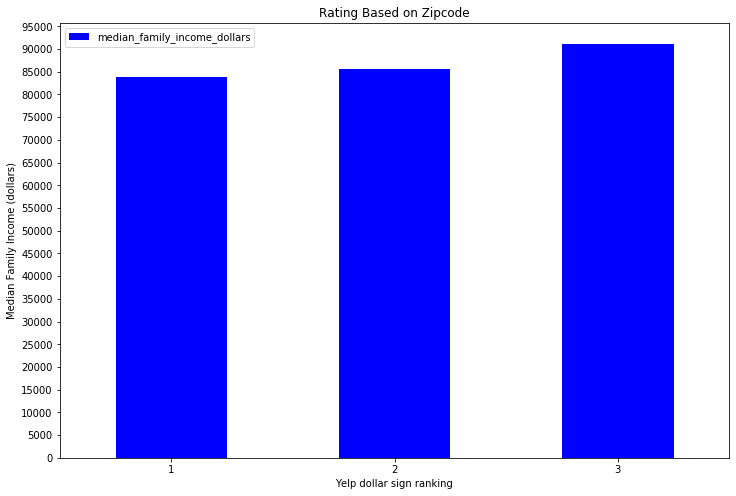

In [10]:
selected_columns_3 = final_df[["price",'median_family_income_dollars']]


graph3 = selected_columns_3.copy()

graph2


graph3.groupby(['price']).mean().plot(kind='bar',color='blue',figsize=(12,8))
plt.title('Rating Based on Zipcode')
plt.xlabel('Yelp dollar sign ranking')
plt.ylabel('Median Family Income (dollars)')
degrees = 0
plt.xticks(rotation=degrees)
plt.yticks(np.arange(0, 100000, step=5000))

### This is the third and last graph I will be showing from our datasets and exploration. I found that this graph was the most relevant to our exploration of data and using statistical testing. As a bar graph, it isn't the best at visualizing; however, you can see a small difference in the 3 dollar sign, and 1 dollar sign restaurants.


#### This one I did slightly differently than above. I grouped by the dollar sign rating, and then made some minor adjustments as above. I adjusted the y ticks to help visualize things a bit better.

### This last graph is useful because it is the one we will be using to analyze mathematically. It is grouping by price rating on Yelp, and then found the median family income based on the price rating in the same zipcode. It shows that 3 dollar signs is slightly higher than both, but it doesn't appear to be much different. This shocked me and helped me visualize the data better.

### If we groupby zipcode and find the Kruk Wallis outcome, we get a 0.00.

#### I do things manually here because I totally forgot the itterrows function, and got stuck making a loop when sorting values. I know this  isn't the most efficient or effective way, but I just wanted to see if there was a relationship at all. A 0.00 shows that the data is impossible under our given null.

In [11]:

df_zip_sorted = final_df.sort_values(by  = ['zip_code'])
z1 = df_zip_sorted[0:9]['median_family_income_dollars']
z2 = df_zip_sorted[9:86]['median_family_income_dollars']
z3 = df_zip_sorted[86:241]['median_family_income_dollars']
z4 = df_zip_sorted[241:356]['median_family_income_dollars']
z5 = df_zip_sorted[356:433]['median_family_income_dollars']
z6 = df_zip_sorted[433:484]['median_family_income_dollars']
z7 = df_zip_sorted[484:512]['median_family_income_dollars']
z8 = df_zip_sorted[512:515]['median_family_income_dollars']
z9 = df_zip_sorted[515:532]['median_family_income_dollars']
z10 = df_zip_sorted[532:618]['median_family_income_dollars']
z11 = df_zip_sorted[618:708]['median_family_income_dollars']
z12 = df_zip_sorted[708:722]['median_family_income_dollars']
z13 = df_zip_sorted[722:778]['median_family_income_dollars']
z14 = df_zip_sorted[778:818]['median_family_income_dollars']
z15 = df_zip_sorted[818:958]['median_family_income_dollars']
z16 = df_zip_sorted[958:970]['median_family_income_dollars']
z17 = df_zip_sorted[970:1089]['median_family_income_dollars']
z18 = df_zip_sorted[1089:1099]['median_family_income_dollars']
z19 = df_zip_sorted[1099:1101]['median_family_income_dollars']
z20 = df_zip_sorted[1101:1108]['median_family_income_dollars']
z21 = df_zip_sorted[1108:1129]['median_family_income_dollars']
z22 = df_zip_sorted[1129:1237]['median_family_income_dollars']
z23 = df_zip_sorted[1237:1371]['median_family_income_dollars']
z24 = df_zip_sorted[1371:1490]['median_family_income_dollars']
z25 = df_zip_sorted[1490:1542]['median_family_income_dollars']
z26 = df_zip_sorted[1542:1611]['median_family_income_dollars']
z27 = df_zip_sorted[1611:1707]['median_family_income_dollars']
z28 = df_zip_sorted[1707:1745]['median_family_income_dollars']
z29 = df_zip_sorted[1745:1883]['median_family_income_dollars']
z30 = df_zip_sorted[1883:1932]['median_family_income_dollars']
z31 = df_zip_sorted[1932:2063]['median_family_income_dollars']
z32 = df_zip_sorted[2063:2125]['median_family_income_dollars']
z33 = df_zip_sorted[2125:2172]['median_family_income_dollars']
z34 = df_zip_sorted[2172:2291]['median_family_income_dollars']
z35 = df_zip_sorted[2291:2377]['median_family_income_dollars']
z36 = df_zip_sorted[2377:2454]['median_family_income_dollars']
z37 = df_zip_sorted[2454:2498]['median_family_income_dollars']


stats.kruskal(z1,z2,z3,z4,z5,z6,z7,z8,z9,z10,z11,z12,z13,z14,z15,z16,z17,z18,z19,z20,z21,z22,z23,z24,z25,z26
             ,z27,z28,z29,z30,z31,z32,z33,z34,z35,z36,z37)

#z1

KruskalResult(statistic=2496.9999999999986, pvalue=0.0)

## This is our most important result that we got after exploring the data. We grouped by price and found the median household income based on the price rating on yelp. I assumed that the data was not normal, since we were given the median and decided to move forward with a kruskal test in order to find if there was significant results in our dataset. 

In [12]:

#df_zip1['zip_code'].value_counts()
#df_zip2['zip_code'].value_counts()



final_df.groupby(['price']).median()


v1 = [85325]
v2 = [89184]
v3 = [96247]

print(stats.kruskal(v1,v2,v3))

KruskalResult(statistic=2.0, pvalue=0.36787944117144245)


In [13]:
final_df.groupby(['price']).median()

,zip_code,median_family_income_dollars,median_household_income_dollars,per_capita_income_dollars,percent_families_below_poverty_line,percent_nonwhite,rating,review_count
price,,,,,,,,
1,27603,85325,66025,33139,8.4,25.6,3.5,17
2,27601,89184,67392,34731,5.5,25.6,3.5,35
3,27605,96247,68864,39008,5.5,25.6,4.0,20


## Chose alpha level of 0.05, the standard. We found that the p-value is 0.368 which is greater than our alpha value which shows that there is no significant difference in the median values if we groupby price.

In [14]:
#z
final_df.groupby(['zip_code']).median().head()

,median_family_income_dollars,median_household_income_dollars,per_capita_income_dollars,percent_families_below_poverty_line,percent_nonwhite,rating,review_count,price
zip_code,,,,,,,,
27501,59408.0,51121.0,21631.0,10.5,17.9,4.0,14.0,1.0
27502,109891.0,95857.0,36763.0,3.4,18.9,3.5,24.0,2.0
27511,82292.0,67392.0,33139.0,9.6,24.8,3.5,33.0,2.0
27513,109736.0,87262.0,41232.0,3.8,27.8,3.5,26.0,2.0
27518,125432.0,98247.0,49865.0,5.5,19.9,3.5,23.0,2.0


In [15]:
#z['median_family_income_dollars']

### We already checked for the median price and saw that there was no significant difference in the median household income based on the restaurant pricing. We are going to check for mean differences amongst family income in dollars grouped by price. Same result, am not the most experienced with kruskal tests so I am not sure what this could mean or does mean.

In [16]:
final_df.groupby(['price']).mean()


x1 = [83917.141525]
x2 = [85600.893236]
x3 = [91190.472527]

print(stats.kruskal(x1,x2,x3))

KruskalResult(statistic=2.0, pvalue=0.36787944117144245)


In [17]:
#final_df.groupby(['zip_code']).mean()

# Ethics & Privacy

I had to change the ethics and privacy considerations for this new project. The data is all publicly accessible, so there should be no concern on the information I am utilizing. I shouldn't need to worry about human ethics or privacy since this is all about restaurants or zipcodes. One thing to consider is that if I were to find significant results regarding this information in the future, or don't that I should consider how this could impact neighborhoods and the families in those zipcodes. If there was a publication explaining how richer neighborhoods are proven to hold more "expensive" restaurants, it could negatively impact the lower socioeconomic status zipcodes. This is something to consider moving forward. There was some inherent bias in the data, as all of it was from one state. This could not be representative of the overall population of the United States. Also, some data got wiped due to errors, either machine, or human which could have impacted the results differently. The question I asked is ethical, the data is all publically accessible, and the post-analysis is ethical as well.

# Conclusion & Discussion


My question was asking if there was a relationship between the price rating on Yelp, and the median family household income. After exploring the data I found that there was indeed NOT a relationship between these two variables. The results showed that there was not a difference when grouping by price rating on Yelp. There was a limiation of time on this, and if I were to expand this moving forward I would consider grouping by zip code properly, or exploring other relationships between household's income and Yelp ratings, either the 1-5 rating, or other aspects of Yelp. Also,  some of the zipcodes had <5 results, so these definitely could have affected the results. I kept these datapoints in order to explore some of the lower-income zipcodes; however, looking back I may have found more significant results if I removed any zipcodes that had less than 5 datapoints. Moving forward this could be something that could be explored on a larger scale, either across multiple states, or the entire United States. Lastly, I would consider grouping the data into different groupings to see if there are any relationships between the data, I am intrigued as to this. 